
# Chemical Equilibrium
## Chem 113, Spring 2020, Liang Shi

In this notebook, we will use two approaches to work out the equilibrium constant of the gas phase reaction of nitrous acid and nitric acid to form water (gas) and dinitrogen tetraoxide at 298.15 K that initially starts with 1 mole of each reactant:

$$ HNO_2 + HNO_3 \rightleftharpoons N_2 O_4 + H_2 O $$

Note that all gases are treated as ideal gas.

In [1]:
# load some libraries for numerical operations and plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

For convenience, let's first define a class for molecules

In [2]:
class Molecule:
    def __init__(self, h, s):
        self.h = h    # standard molar enthalpy of formation (kJ/mol)
        self.s = s    # standard molar entropy (kJ/mol/K)
        self.n = 0.0  # mole
        self.x = 0.0  # mole fraction
        self.p = 0.0  # partial pressure (bar)
        self.g = 0.0  # standard molar Gibbs free energy of formation (kJ/mol)    

The standard molar enthalpies of formation and standard molar entropies of relevant molecules are provided in the table below:


|  Molecule  |  $\Delta_f H^{\circ}\\(kJ\cdot mol^{-1})$  | $S^{\circ}\\(J\cdot mol^{-1} \cdot K^{-1})$  |
|:---:|:---:|:---:|
|  $O_2$ | 0  | 205.2  |
|  $N_2$ | 0  | 191.6  |
|  $H_2$ | 0  | 130.7  |
| $HNO_2$ | -76.73 | 249.41 |
| $HNO_3$ | -134.31 | 266.39 |
| $N_2 O_4$ | 9.08 | 304.38 |
| $H_2 O$ | -241.83 | 188.84 |



Assign these properties to the corresponding molecules:

In [3]:
o2 = Molecule(0.0, 205.2/1000.0) # divided the entropy by 1000 to convert the unit to kJ /mol /K
n2 = Molecule(0.0, 191.6/1000.0)
h2 = Molecule(0.0, 130.7/1000.0)
hno2 = Molecule(-76.73, 249.41/1000.0)
hno3 = Molecule(-134.31, 266.39/1000.0)
n2o4 = Molecule(9.08, 304.38/1000.0)
h2o = Molecule(-241.83, 188.84/1000.0)

Set up the parameters for the reaction system. The initial moles of $HNO_2$ and $HNO_3$ are 1 mol, and the total mole of gases in the reaction system is always 2 mol due to the stoichiometry of the reaction. The total pressure in the reaction system is kept at 1 bar. 

In [4]:
R = 0.0083145 # kJ /mol /K
T = 298.15 # temperature (K)
p0 = 1.0 # standard pressure P0 is 1 bar
pt = 1.0 # the total pressure in the reaction system is kept at 1 bar
nt = 2.0 # total mole of gases is always 2 mol

### Approach 1: a plot of the Gibbs free energy of a reaction mixture against the reaction extent is a minimum at equilibrium

For thermodynamic equilibrium at constant $N$, $P$, and $T$, the Gibbs free energy of the system reaches a minimum (see the extremum principles discussed in Chapter 22). The Gibbs free energy of the system is a function of the reaction extent, $\xi$, and the equiliubrium state corresponds to an equilibrium $\xi$, denoted as $\xi_{eq}$. The goal of this approach is to find $\xi_{eq}$ that miminizes $G(\xi)$.

In the code below the reaction extent $\xi$ is denoted as xi, and we use an array to describe it (at the end, we will plot $G(\xi)$ vs. $\xi$). 

In [5]:
xi = np.arange(0.01,0.99,0.0001) # reaction extent

Using reaction extent, we can compute the moles of gases, the mole fractions of gases, and partial pressures of gases in the reaction system.

In [6]:
# moles of gases (initial moles of HNO2 and HNO3 are 1 mol)
hno2.n = 1.0 - xi
hno3.n = 1.0 - xi
n2o4.n = xi
h2o.n = xi

# mole fractions of gases (nt: total mole of gases)
hno2.x = hno2.n / nt 
hno3.x = hno3.n / nt
n2o4.x = n2o4.n / nt
h2o.x = h2o.n / nt

# partial pressures of gases (pt: the total pressure in the reaction system)
# based on Dalton's law of partial pressures
hno2.p = hno2.x * pt
hno3.p = hno3.x * pt
n2o4.p = n2o4.x * pt
h2o.p = h2o.x * pt

With partial pressures of gases in hand, we can compute the reaction quotient $Q$ as a function of reaction extent $\xi$. At equilibrium, $\xi=\xi_{eq}$, and equilibrium constant $K_P = Q(\xi_{eq})$. 

In [7]:
# reaction quotient Q
Q = (n2o4.p/p0) * (h2o.p/p0) / ( (hno2.p/p0) * (hno3.p/p0) )

To calculate the Gibbs free energy of the reaction system, $G(\xi)$, we need to compute the molar Gibbs free energy (namely, chemical potential) of each gas at its partial pressure. The molar Gibbs free energy of gas, $\bar{G}(T,P)$ (namely, chemical potential $\mu(T,P)$) is given by (see equation (23.33) in M&S)

$$\bar{G}(T,P)=\bar{G}^{\circ}(T) + RT \ln \frac{P}{P_0},$$

where $\bar{G}^{\circ}$ is the standard molar Gibbs free energy, and the standard state pressure $P_0 = 1 bar$.

Free energy, just like energy, is relative, and we can choose a reference such that the standard molar Gibbs free energy $\bar{G}^{\circ}$ equals the standard molar Gibbs free energy of formation $\Delta_f G^{\circ}$. We need to first calculate the standard molar Gibbs free energy of formation for all gases using standard molar enthalpy of formation and standard molar entropy (see section 26-3 in M&S).

In [8]:
# Compute standard molar Gibbs free energy of formation (kJ/mol)
# note that it might be more compact if we define a function to 
# compute this.

# for HNO2: 0.5 H2 + 0.5 N2 + O2 ---> HNO3 (reaction for the formation of HNO3 from its constituent elements.)
drh = hno2.h - 0.5*h2.h - 0.5*n2.h - o2.h  # standard reaction enthalpy change
drs = hno2.s - 0.5*h2.s - 0.5*n2.s - o2.s  # standard reaction entropy change 
drg = drh - T * drs # standard reaction Gibbs free energy change
hno2.g = drg

# for HNO3: 0.5 H2 + 0.5 N2 + 1.5 O2 ---> HNO3
drh = hno3.h - 0.5*h2.h - 0.5*n2.h - 1.5*o2.h
drs = hno3.s - 0.5*h2.s - 0.5*n2.s - 1.5*o2.s
drg = drh - T * drs
hno3.g = drg

# for N2O4: N2 + 2 O2 ---> N2O4
drh = n2o4.h - n2.h - 2.0*o2.h
drs = n2o4.s - n2.s - 2.0*o2.s
drg = drh - T * drs
n2o4.g = drg

# for H2O: H2 + 0.5 O2 ---> H2O
drh = h2o.h - h2.h - 0.5*o2.h
drs = h2o.s - h2.s - 0.5*o2.s
drg = drh - T * drs 
h2o.g = drg

Now we can compute the Gibbs free energy of the reaction system by using

$$ G = \sum_{i=HNO_2, HNO_3, N_2 O_4, H_2 O} n_i \bar{G}_i, $$

where 
 
$$\bar{G}_i=\bar{G}_i^{\circ} + RT \ln \frac{P_i}{P_0},$$

$$ \bar{G}_i^{\circ} = \Delta_f G_i^{\circ},$$

and $P_i$ is the partial pressure of the gas $i$.

In [9]:
# compute G(xi)
g = hno2.n*(hno2.g+R*T*np.log(hno2.p/p0)) \
  + hno3.n*(hno3.g+R*T*np.log(hno3.p/p0)) \
  + n2o4.n*(n2o4.g+R*T*np.log(n2o4.p/p0)) \
  + h2o.n*(h2o.g+R*T*np.log(h2o.p/p0))

Now let's plot $G$ as a function of $\xi$:

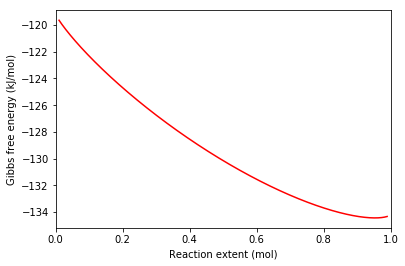

In [10]:
# plot G(xi)
plt.plot(xi, g, 'r-')
plt.xlabel('Reaction extent (mol)')
plt.ylabel('Gibbs free energy (kJ/mol)')
plt.xlim((0,1))
plt.show()

There is a minimum probably around $\xi=0.95$, and let's get the equilibrium reaction extent, $\xi_{eq}$.

In [11]:
idx = g.argmin() # find the xi that minimizes G
xieq = xi[idx] # equilibrium xi
print("Equilibrium reaction extent is", xieq)

('Equilibrium reaction extent is', 0.95349999999999435)


As mentioned, at equilibrium, $\xi=\xi_{eq}$, and equilibrium constant $K_P = Q(\xi_{eq})$. 

In [12]:
Kp1 = Q[idx] # equilibrium constant
print("The equilibrium constant obtained from approach 1 is",Kp1)

('The equilibrium constant obtained from approach 1 is', 420.47045901249544)


**Note: in practice, we never use approach 1 to compute equilibrium constant.**

### Approach 2: use $\Delta_r G^{\circ}(T) = - RT \ln K_P (T)$ (equation (26.11) in M&S)

This is the approach you should know. Standard reaction Gibbs free energy change can be computed from

$$ \Delta_r G^{\circ} = \Delta_r H^{\circ} - T \Delta_r S^{\circ}, $$

where $\Delta_r H^{\circ}$ and $\Delta_r S^{\circ}$ can be computed from Equation (19.52) and the equation in section 21-9 in M&S, respectively. With $ \Delta_r G^{\circ}$ in hand, the equilibrium constant is given by

$$ K_p = e^{- \Delta_r G^{\circ} / RT } $$

In [14]:
# approach 2
drh = n2o4.h + h2o.h - hno2.h - hno3.h # standard reaction enthalpy change
drs = n2o4.s + h2o.s - hno2.s - hno3.s # standard reaction entropy change
drg = drh - T * drs # standard reaction Gibbs free energy change
Kp2 = np.exp(-drg/(R*T)) # compute Kp using approach 2
print("The equilibrium constant obtained from approach 1 is",Kp2)

('The equilibrium constant obtained from approach 1 is', 420.70774339515617)


**Group Exercise**

The two approaches give slightly different equilibrium constants due to numerical error. What would you change to reduce the numerical error? Try it.